## WORKGROUP 5


Integrantes:
- Valeria Hoyos Macedo
- Josué Eduardo Maguiña Mezaz
- Alvaro Alexander Yllu Socualaya
- Maria pamela Cubas Albujar

In [ ]:
datos <- read_csv("C:/Users/vn.hoyosm/Documents/processed_esti.csv")


Rows: 1739 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): y, w, gender_female, gender_male, gender_transgender, ethnicgrp_as...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(datos)

y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
1,1,0,1,0,0,0,0,0,1,0,1,0,24,2


In [ ]:
library(dplyr)
library(broom)
library(kableExtra)

In [ ]:
# Definir las variables de interés
variables <- c("age", "gender_female", "gender_male", "gender_transgender",
               "ethnicgrp_asian", "ethnicgrp_black", "ethnicgrp_mixed_multiple",
               "ethnicgrp_other", "ethnicgrp_white", "partners1", "msm", "imd_decile")

# Lista para almacenar las estadísticas descriptivas
stats_list <- list()

# Calcular estadísticas descriptivas para cada variable
for (var in variables) {
  stats <- datos %>%
    group_by(w) %>%
    summarise(
      n = n(),
      mean = mean(.data[[var]], na.rm = TRUE),
      sd = sd(.data[[var]], na.rm = TRUE)
    ) %>%
    mutate(variable = var)

  stats_list[[var]] <- stats
}

# Convertir la lista de estadísticas a un data frame
stats_df <- bind_rows(stats_list)

# Reorganizar stats_df para tener una variable por fila y por w en columnas
reshaped_stats <- stats_df %>%
  pivot_wider(
    id_cols = variable,
    names_from = w,
    values_from = c(mean, sd)
  ) %>%
  mutate(
    variable = factor(variable, levels = variables)
  ) %>%
  arrange(variable)

# Calcular las diferencias y organizar la tabla final
tabla_final <- reshaped_stats %>%
  mutate(
    Control_mean = mean_0,
    Treatment_mean = mean_1,
    Control_sd = sd_0,
    Treatment_sd = sd_1,
    Diff = mean_1 - mean_0
  ) %>%
  select(variable, Control_mean, Control_sd, Treatment_mean, Treatment_sd, Diff)

# Imprimir la tabla final
print("Table 1: Descriptive Statistics and Balance")
print(tabla_final)


[1] "Table 1: Descriptive Statistics and Balance"
# A tibble: 12 × 6
   variable         Control_mean Control_sd Treatment_mean Treatment_sd     Diff
   <fct>                   <dbl>      <dbl>          <dbl>        <dbl>    <dbl>
 1 age                  23.0         3.59         23.2           3.54    0.111  
 2 gender_female         0.581       0.494         0.587         0.493   0.00672
 3 gender_male           0.418       0.494         0.409         0.492  -0.00876
 4 gender_transgen…      0.00122     0.0350        0.00326       0.0570  0.00203
 5 ethnicgrp_asian       0.0550      0.228         0.0717        0.258   0.0166 
 6 ethnicgrp_black       0.0929      0.290         0.0803        0.272  -0.0126 
 7 ethnicgrp_mixed…      0.0929      0.290         0.0847        0.279  -0.00822
 8 ethnicgrp_other       0.0171      0.130         0.00977       0.0984 -0.00734
 9 ethnicgrp_white       0.742       0.438         0.754         0.431   0.0115 
10 partners1             0.292       0.4

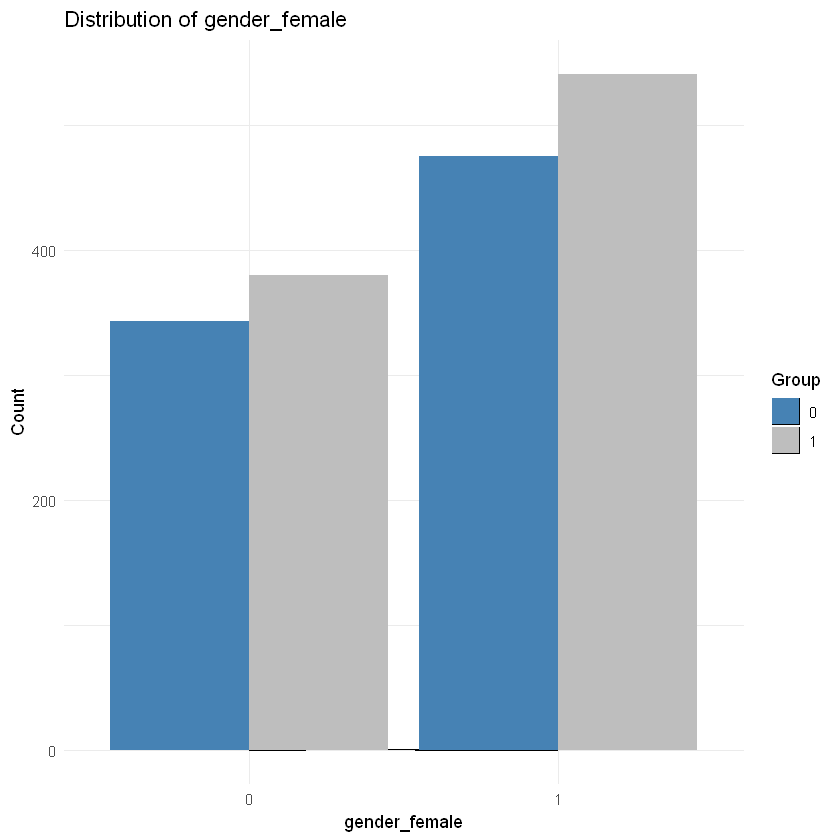

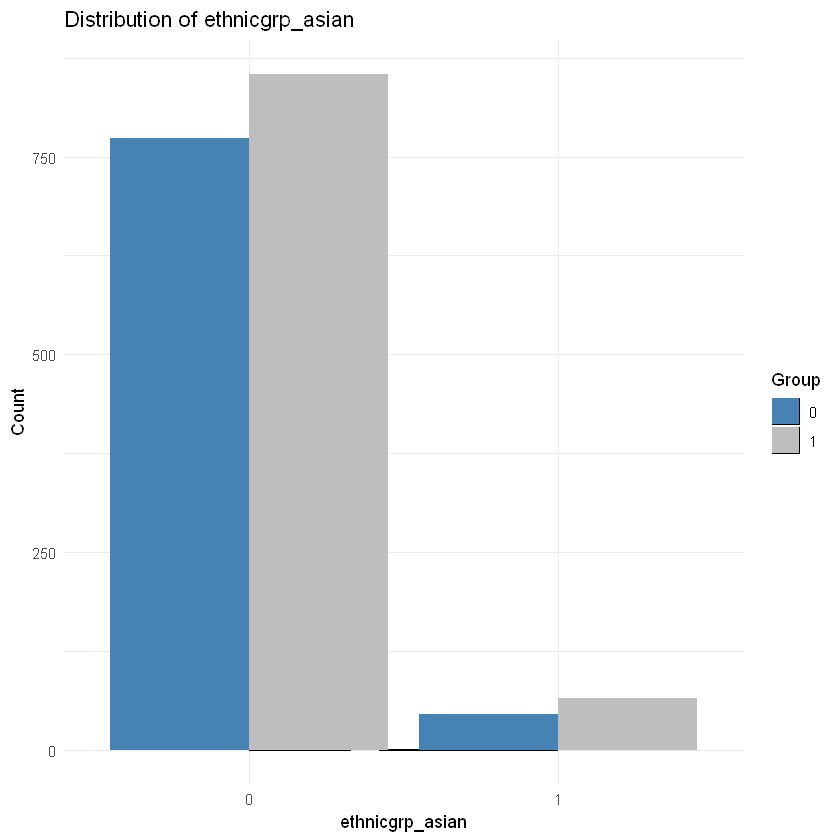

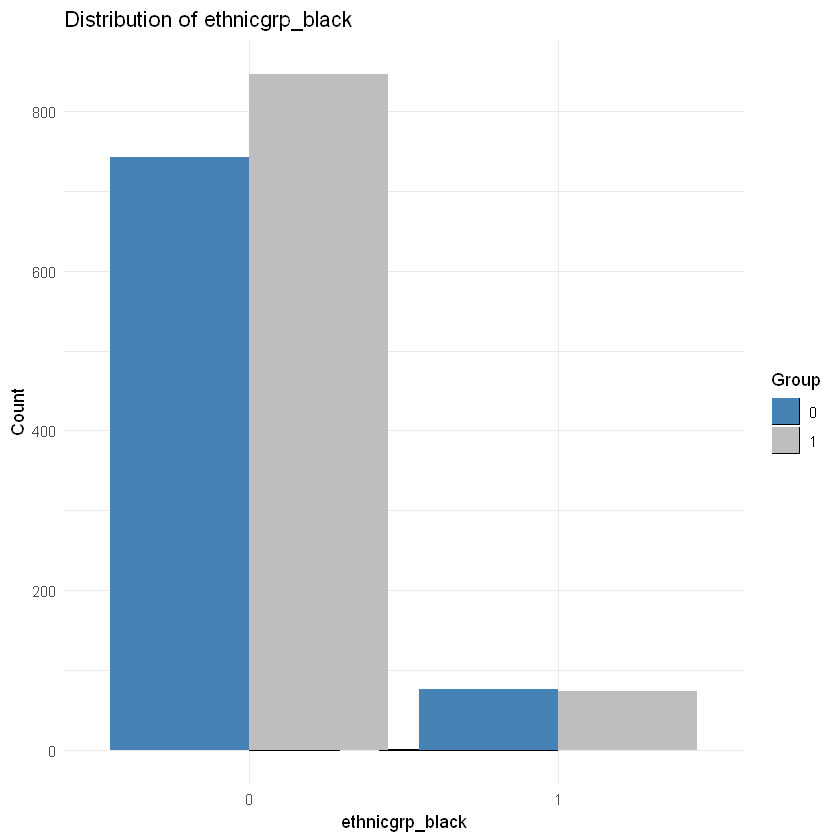

In [ ]:
library(ggplot2)

# Variables categóricas de interés
categorical_vars <- c("gender_female", "ethnicgrp_asian", "ethnicgrp_black")
colores <- c("steelblue", "gray")

# Función para crear gráfico de barras
create_bar_plot <- function(data, var) {
  ggplot(data, aes(x = factor(get(var)), fill = factor(w))) +
      geom_bar(position = "dodge", stat = "count") +
      scale_fill_manual(values = colores) +
      theme_light() +
    labs(x = var, y = "Count", fill = "Group") +
    ggtitle(paste("Distribution of", var)) +
    theme_minimal()
}

# Crear y mostrar gráficos de barras para cada variable categórica
for (var in categorical_vars) {
  plot <- create_bar_plot(datos, var)
  print(plot)
}


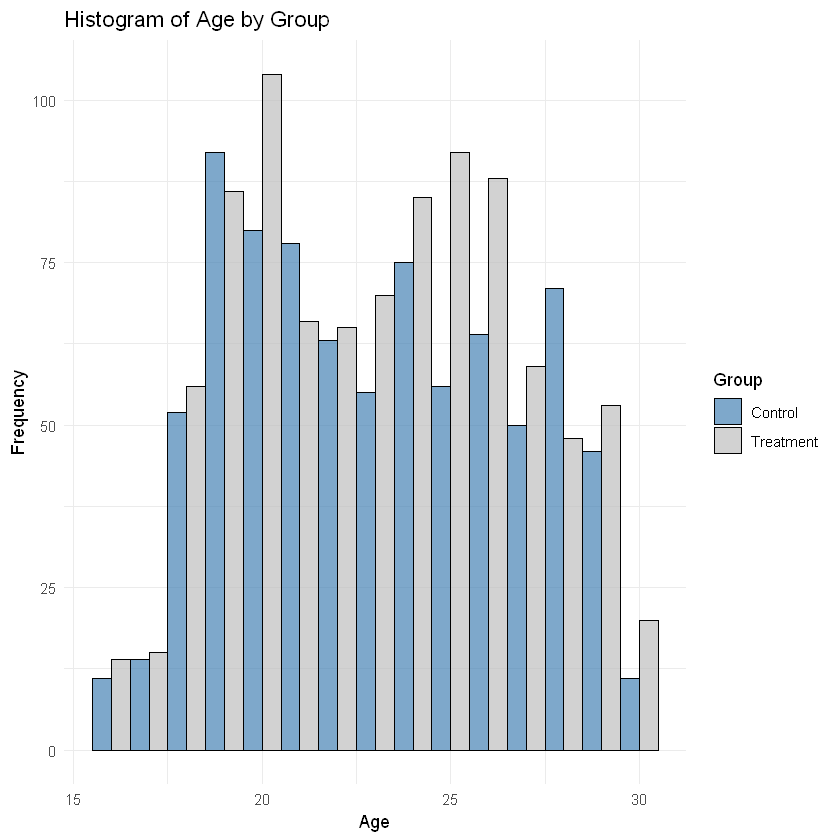

In [ ]:
# Crear el histograma de la variable 'age' por grupo (w)
ggplot(datos, aes(x = age, fill = factor(w))) +
  geom_histogram(position = "dodge", binwidth = 1, color = "black", alpha = 0.7) +
  scale_fill_manual(values = c("steelblue", "gray"),
                    name = "Group",
                    labels = c("Control", "Treatment")) +
  labs(title = "Histogram of Age by Group",
       x = "Age",
       y = "Frequency") +
  theme_minimal()


In [ ]:
# Realizar la regresión lineal
model <- lm(y ~ w, data = datos)
nocontrol.est <- summary(model)$coef["w",1]
CI1upper <-confint(model)[2,2]
CI1low <-confint(model)[2,1]

summary(model)


Call:
lm(formula = y ~ w, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4767 -0.4767 -0.2115  0.5233  0.7885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21149    0.01605   13.17   <2e-16 ***
w            0.26516    0.02206   12.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4591 on 1737 degrees of freedom
Multiple R-squared:  0.0768,	Adjusted R-squared:  0.07627 
F-statistic: 144.5 on 1 and 1737 DF,  p-value: < 2.2e-16


Interpretation: There is a significant (p<0.05) and positive effect of the treatment on the outcome. The probability that Y is equal to 1 increases by 26.52 percentage points when w=1, compared to w=0. However, there is omitted variable bias because only outocme was regressed with treatment

In [ ]:
formula <- y ~ w + age + gender_female  + ethnicgrp_black + gender_transgender + msm
model <- lm(formula, data = datos)
control.est <- summary(model)$coef[2,1]
CI2upper <-confint(model)[2,2]
CI2low <-confint(model)[2,1]
summary(model)


Call:
lm(formula = formula, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6280 -0.3638 -0.1853  0.4874  0.9203 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.216998   0.075399  -2.878 0.004051 ** 
w                   0.261294   0.021816  11.977  < 2e-16 ***
age                 0.016486   0.003092   5.333  1.1e-07 ***
gender_female       0.089087   0.024942   3.572 0.000364 ***
ethnicgrp_black    -0.066363   0.038931  -1.705 0.088441 .  
gender_transgender  0.424825   0.227945   1.864 0.062530 .  
msm                 0.017699   0.036669   0.483 0.629402    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4537 on 1732 degrees of freedom
Multiple R-squared:  0.1012,	Adjusted R-squared:  0.09807 
F-statistic:  32.5 on 6 and 1732 DF,  p-value: < 2.2e-16


Interpretation: There is a significant (p<0.01) and positive effect of the treatment on the outcome. The probability that Y is equal to 1 increases by 26.13 percentage points when w=1, compared to w=0. Likewise, the other variables that were significant are age and female with a significance level of 0.01.

Use the Double Lasso Method to estimate Y ~ T + X. Please show a clear table output and interpret the results.


In [ ]:
# Cargar las librerías necesarias
library(glmnet)

# Definir las variables
T <- datos$w
Y <- datos$y
X <- model.matrix(formula, data = datos)[,-1]

# Ajustar el modelo Lasso con validación cruzada
cv.lasso <- cv.glmnet(as.matrix(X), T, alpha = 1)

# Obtener los coeficientes del modelo Lasso
lasso_coefs <- coef(cv.lasso, s = "lambda.min")

# Seleccionar las covariables no nulas
selected_covariates <- rownames(lasso_coefs)[lasso_coefs[, 1] != 0]
selected_covariates <- selected_covariates[selected_covariates != "(Intercept)"]

# Comprobar si hay covariables seleccionadas
if (length(selected_covariates) > 0) {
  # Crear la fórmula del modelo
  model_formula <- as.formula(paste("y ~", paste(selected_covariates, collapse = " + ")))
} else {
  # Si no hay covariables seleccionadas, usar solo el intercepto
  model_formula <- as.formula("y ~ 1")
}

# Ajustar el modelo lineal
modelo1 <- lm(model_formula, data = datos)
lasso.est <- summary(modelo1)$coef[2,1]
CI3upper <-confint(modelo1)[2,2]
CI3low <-confint(modelo1)[2,1]

# Mostrar el resumen del modelo
summary(modelo1)



Call:
lm(formula = model_formula, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4767 -0.4767 -0.2115  0.5233  0.7885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21149    0.01605   13.17   <2e-16 ***
w            0.26516    0.02206   12.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4591 on 1737 degrees of freedom
Multiple R-squared:  0.0768,	Adjusted R-squared:  0.07627 
F-statistic: 144.5 on 1 and 1737 DF,  p-value: < 2.2e-16


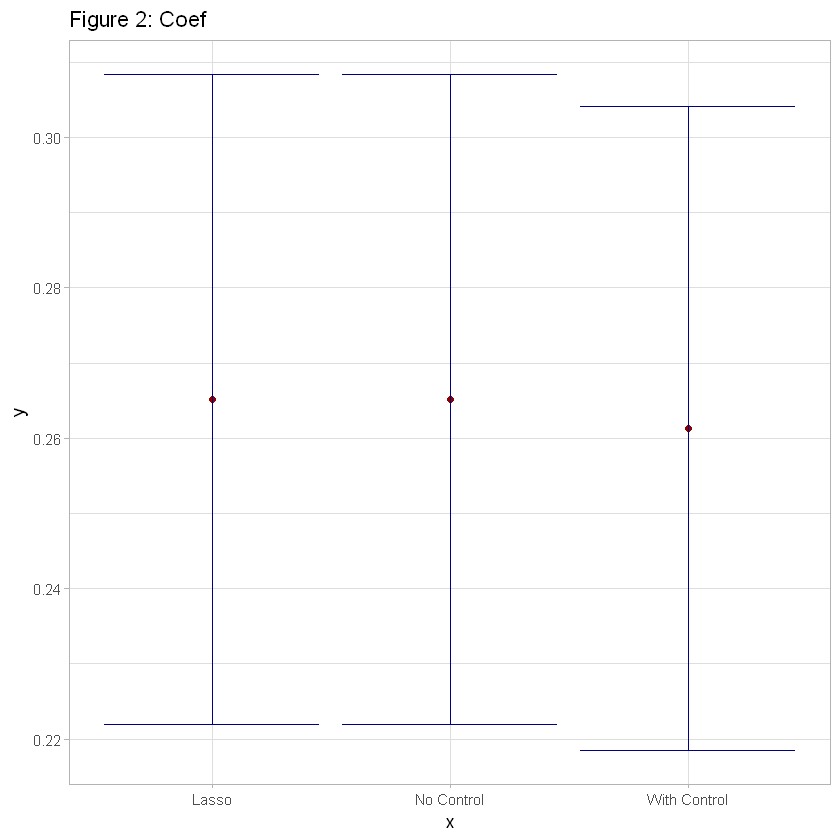

In [ ]:
CIdf <- data.frame(x = c('No Control','With Control','Lasso'),
                         y = c(nocontrol.est,control.est, lasso.est),
                         lower = c(CI1low,CI2low,CI3low),
                         upper = c(CI1upper,CI2upper, CI3upper))
ggplot(CIdf, aes(x, y)) +
  geom_point(color = "darkred") +  # Puntos rojos
  geom_errorbar(aes(ymin = lower, ymax = upper), color = "navyblue") +  # Borde de los intervalos de error azules
  ggtitle("Figure 2: Coef") +
  theme_light()

In [1]:
# Import relevant packages
install.packages("xtable")
install.packages("randomForest")
install.packages("glmnet")
install.packages("hdm")
install.packages("sandwich")
install.packages("sandwich")
install.packages("rpart")
install.packages("gbm")

library(xtable)
library(dplyr)
install.packages("gbm")
library(rpart)
library(randomForest)
library(hdm)
library(glmnet)
library(sandwich)
set.seed(123)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:

# 3.Non-Linear Methods DML

In [20]:
data <- read.csv("https://github.com/gsbDBI/ExperimentData/raw/97a11199ba559f01c7b3803a1493ffa08631732e/eSTI/processed_data/processed_esti.csv")
data$pendiente <- rep(1, nrow(data))
head(data)
dim(data)

,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile,pendiente
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6,1
3,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4,1
4,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2,1
5,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3,1
6,1,1,0,1,0,0,0,0,0,1,0,1,0,24,2,1


[1] 1739   16

In [12]:
DML2.for.PLM <- function(x, d, y, dreg, yreg, nfold=10) {
  nobs <- nrow(x) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    dfit <- dreg(x[-I[[b]],], d[-I[[b]]]) #take a fold out
    yfit <- yreg(x[-I[[b]],], y[-I[[b]]]) # take a foldt out
    dhat <- predict(dfit, x[I[[b]],]) #predict the left-out fold
    yhat <- predict(yfit, x[I[[b]],]) #predict the left-out fold
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
        }
  rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  coef.est <- coef(rfit)[2]  #extract coefficient
  se <- sqrt(vcovHC(rfit)[2,2]) #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals
}


In [13]:
DML2.version2 <- function(x, d, y, dreg, yreg, nfold=10) {
  nobs <- nrow(x) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    dfit <- dreg(x[-I[[b]],], d[-I[[b]]]) #take a fold out
    yfit <- yreg(x[-I[[b]],], y[-I[[b]]]) # take a foldt out
    dhat <- predict(dfit, as.data.frame(x[I[[b]],])) #predict the left-out fold
    yhat <- predict(yfit, as.data.frame(x[I[[b]],])) #predict the left-out fold
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
        }
  rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  coef.est <- coef(rfit)[2]  #extract coefficient
  se <- sqrt(vcovHC(rfit)[2,2]) #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals
}


In [8]:
y <- as.matrix(data['y'])
d <- as.matrix(data['w'])
x <- as.matrix(data[, !(names(data) %in% c('y', 'w'))])

# We now run through DML using as first stage models:

- Robust Lasso
- Regression Trees
- Boosting Trees
- Regression Forest

## 3.1 DML with RLasso:

In [22]:
cat(sprintf("\nDML with Lasso \n"))
dreg <- function(x,d){ rlasso(x,d, post=FALSE) }
yreg <- function(x,y){ rlasso(x,y, post=FALSE) }
DML2_rlasso = DML2.for.PLM(x, d, y, dreg, yreg, nfold=10)


DML with Lasso 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.258965 (0.021632)


## 3.2 DML with Regresion Trees:

In [23]:
cat(sprintf("\nDML with Regression Tree \n"))
dreg <- function(x, d) { rpart(d ~ ., data = as.data.frame(cbind(d, x)), control = rpart.control(cp = 0.001, minsplit = 5))}
yreg <- function(x, y) { rpart(y ~ ., data = as.data.frame(cbind(y, x)), control = rpart.control(cp = 0.001, minsplit = 5))}
DML2_tree = DML2.version2(x, d, y, dreg, yreg, nfold=10)


DML with Regression Tree 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.219189 (0.0215206)


## 3.3 DML with Boosting Trees:

In [26]:
cat(sprintf("\nDML with Boosting Tree \n"))
dreg <- function(x, d) { gbm::gbm(d ~ ., data = as.data.frame(cbind(d, x)), n.trees=100, interaction.depth=3, shrinkage=0.01, cv.folds=5) }
yreg <- function(x, y) { gbm::gbm(y ~ ., data = as.data.frame(cbind(y, x)), n.trees=100, interaction.depth=3, shrinkage=0.01, cv.folds=5) }
DML2_boost = DML2.version2(x, d, y, dreg, yreg, nfold=10)


DML with Boosting Tree 
fold: Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 96 trees...


Using 100 trees...




1  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 96 trees...


Using 100 trees...




2  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 69 trees...


Using 100 trees...




3  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 82 trees...


Using 100 trees...




4  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 68 trees...


Using 100 trees...




5  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 73 trees...


Using 100 trees...




6  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 80 trees...


Using 100 trees...




7  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 26 trees...


Using 100 trees...




8  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 71 trees...


Using 99 trees...




9  Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...


Using 81 trees...


Using 100 trees...




10  
coef (se) = 0.254267 (0.0221887)


## 3.4 DML with Regression Forest:

In [27]:
cat(sprintf("\nDML with Random Forest \n"))
dreg <- function(x,d){ randomForest(x, d) }
yreg <- function(x,y){ randomForest(x, y) }
DML2_rf = DML2.for.PLM(x, d, y, dreg, yreg, nfold=10)


DML with Random Forest 
fold: 

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


1  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


2  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


3  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


4  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


5  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


6  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


7  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


8  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


9  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


10  
coef (se) = 0.245396 (0.0213869)


## 3.5 Table and plot with all the results:

In [28]:
prRes_D <- c(mean(DML2_rlasso$dtil^2), mean(DML2_tree$dtil^2), mean(DML2_boost$dtil^2), mean(DML2_rf$dtil^2))
prRes_Y <- c(mean(DML2_rlasso$ytil^2), mean(DML2_tree$ytil^2), mean(DML2_boost$ytil^2), mean(DML2_rf$ytil^2))

prRes <- rbind(sqrt(prRes_D), sqrt(prRes_Y))
rownames(prRes) <- c("RMSE D", "RMSE Y")
colnames(prRes) <- c("Robust Lasso", "Regression Trees", "Boosting Trees", "Regression Forest")

In [29]:
table <- matrix(0, 4, 4)
table[1, 1] <- DML2_rlasso$coef.est
table[2, 1] <- DML2_tree$coef.est
table[3, 1] <- DML2_boost$coef.est
table[4, 1] <- DML2_rf$coef.est

table[1, 2] <- DML2_rlasso$se
table[2, 2] <- DML2_tree$se
table[3, 2] <- DML2_boost$se
table[4, 2] <- DML2_rf$se

table[1, 3] <- prRes[2, 1]
table[2, 3] <- prRes[2, 2]
table[3, 3] <- prRes[2, 3]
table[4, 3] <- prRes[2, 4]

table[1, 4] <- prRes[1, 1]
table[2, 4] <- prRes[1, 2]
table[3, 4] <- prRes[1, 3]
table[4, 4] <- prRes[1, 4]

colnames(table) <- c("Estimate", "Standard Error", "RMSE Y", "RMSE D")
rownames(table) <- c("Robust Lasso", "Regression Trees", "Boosting Trees", "Regression Forest")

In [30]:
print(table, digit=4)

                  Estimate Standard Error RMSE Y RMSE D
Robust Lasso        0.2590        0.02163 0.4711 0.4985
Regression Trees    0.2192        0.02152 0.5207 0.5657
Boosting Trees      0.2543        0.02219 1.0852 0.6523
Regression Forest   0.2454        0.02139 0.4704 0.5066


In [ ]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




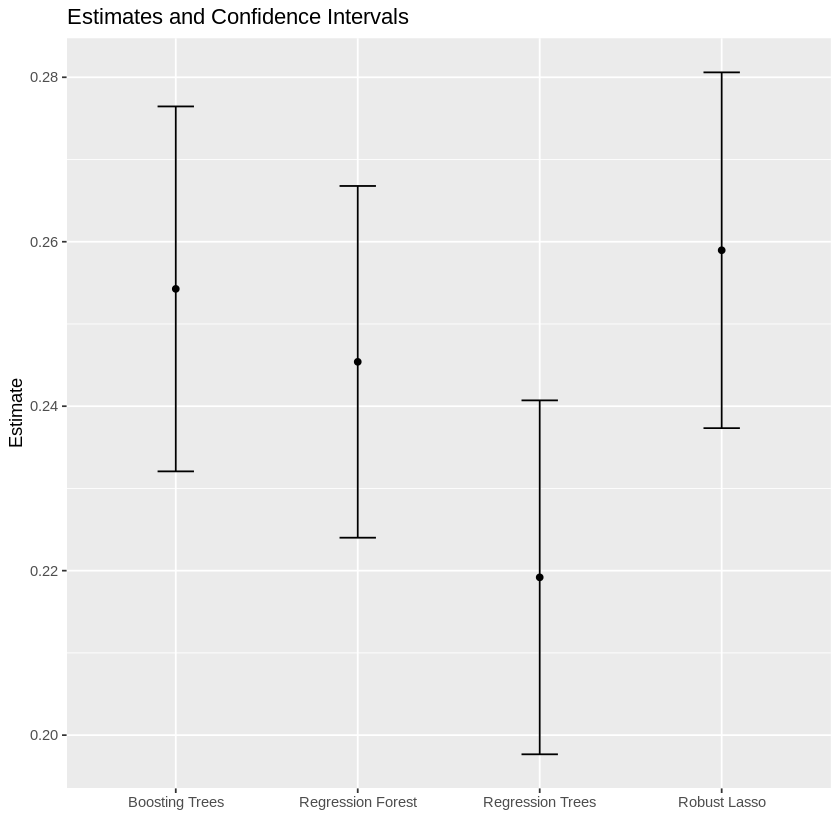

In [ ]:
# Create a data frame with the estimates, standard errors, and labels
df <- data.frame(
  label = rownames(table),
  estimate = table[, 1],
  lower = table[, 1] - table[, 2],
  upper = table[, 1] + table[, 2]
)

# Create the plot
ggplot(df, aes(x = label, y = estimate)) +
  geom_point() +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2) +
  labs(x = "", y = "Estimate", title = "Estimates and Confidence Intervals")


## 3.6 What is the method we will choose?

It seems that the best method for predicting D is the Robust Lasso, and the best method for predicting Y is the Regression Forest because they have the smallest RMSE.